In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [5]:
import bayesian_changepoint_detection.online_changepoint_detection as oncd
from functools import partial

In [2]:
def generate_exp_time_series(num, minl=50, maxl=1000):
    data = np.array([], dtype=np.float64)
    lams = np.array([], dtype=np.float)
    partition = np.random.randint(minl, maxl, num)
    print(partition)
    for p in partition:
        lam = np.abs(np.random.uniform(low=0,high=10))
        lams = np.concatenate((lams,np.array(lam)[np.newaxis]))
        tdata = np.random.exponential(scale=1/lam, size=p)
        data = np.concatenate((data, tdata))
    print(lams)
    return data

## generate fake data

[ 59 176 158 148 165 130 108]
[2.36958119 3.03806404 6.06551488 7.38231888 7.89667745 4.81935497
 5.79793237]
(944,)


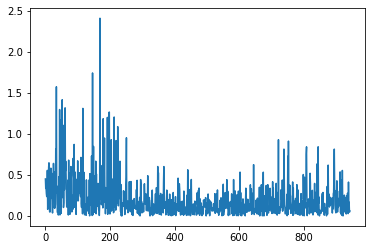

In [3]:
data = generate_exp_time_series(7, 50, 200)
print(data.shape)
plt.plot(data)

## find changepoints

In [8]:
R, maxes = oncd.online_changepoint_detection(data, partial(oncd.constant_hazard, 250), oncd.Lomax(10,2))

/home/ingle/miniconda3/envs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


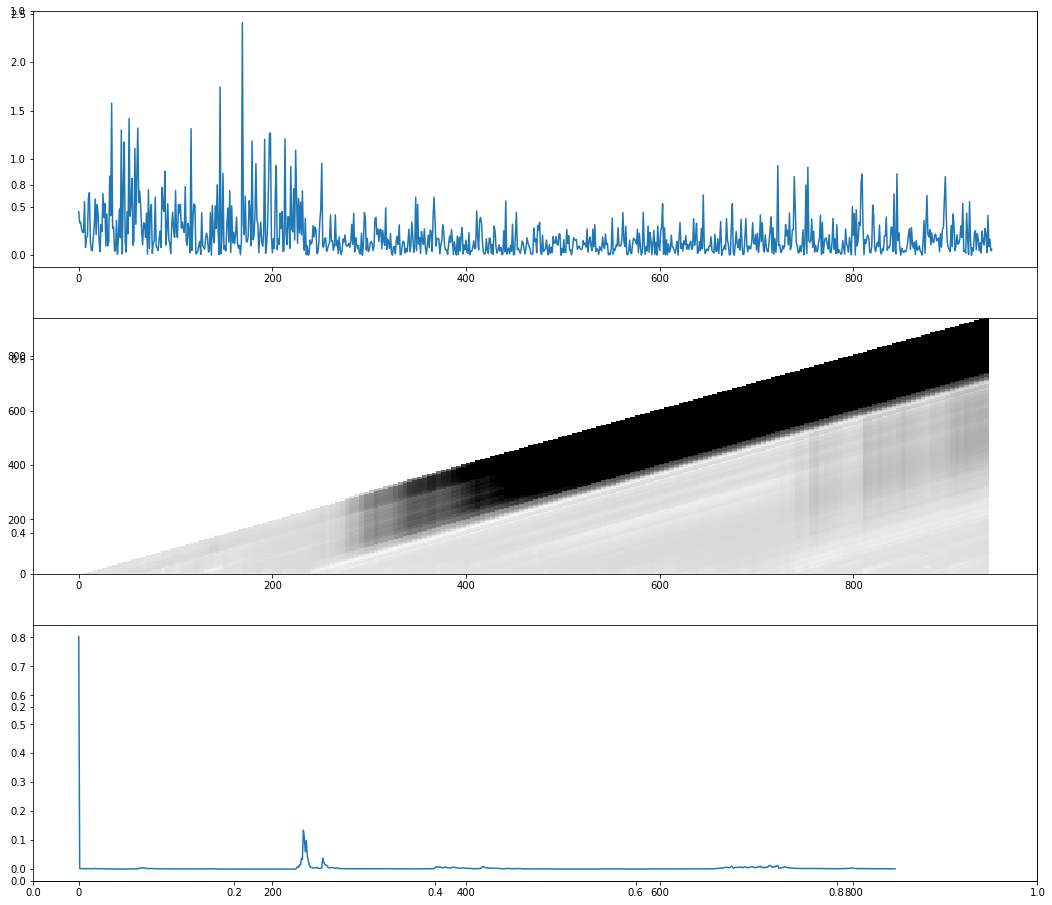

In [9]:
import matplotlib.cm as cm
fig, ax = plt.subplots(figsize=[18, 16])
ax = fig.add_subplot(3, 1, 1)
ax.plot(data)
ax = fig.add_subplot(3, 1, 2, sharex=ax)
sparsity = 5  # only plot every fifth data for faster display
ax.pcolor(np.array(range(0, len(R[:,0]), sparsity)), 
          np.array(range(0, len(R[:,0]), sparsity)), 
          -np.log(R[0:-1:sparsity, 0:-1:sparsity]), 
          cmap=cm.Greys, vmin=0, vmax=30)
ax = fig.add_subplot(3, 1, 3, sharex=ax)
Nw=100;
ax.plot(R[Nw,Nw:-1])